In [4]:
import requests

url = "https://api.data.gov.hk/v2/filter?q=%7B%22resource%22%3A%22http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Flatest_situation_of_reported_cases_covid_19_eng.csv%22%2C%22section%22%3A1%2C%22format%22%3A%22json%22%2C%22sorts%22%3A%5B%5B1%2C%22asc%22%5D%5D%7D"

payload = {}
headers= {}

response = requests.request("GET", url, headers=headers, data = payload)

In [11]:
import json
raw_covid = json.loads(response.text)
raw_covid[0]

{'As of date': '01/02/2020',
 'As of time': '23:59',
 'Number of confirmed cases': 14,
 'Number of ruled out cases': 634,
 'Number of cases still hospitalised for investigation': 188,
 'Number of cases fulfilling the reporting criteria': 835,
 'Number of death cases': 0,
 'Number of discharge cases': 0,
 'Number of probable cases': 0,
 'Number of hospitalised cases in critical condition': ''}

In [31]:
import pandas as pd
df_covid = pd.DataFrame(raw_covid)
df_covid = df_covid[["As of date", "Number of confirmed cases", "Number of death cases"]]
df_covid.rename(columns={"As of date": "Date", "Number of confirmed cases": "Confirmed", "Number of death cases": "Death"}, inplace=True)
df_covid

,Date,Confirmed,Death
0,01/02/2020,14,0
1,01/03/2020,97,2
2,01/04/2020,737,4
3,01/05/2020,1039,4
4,01/06/2020,1087,4
...,...,...,...
241,31/01/2020,13,0
242,31/03/2020,680,4
243,31/05/2020,1084,4
244,31/07/2020,3272,27


In [22]:
df_covid.dtypes

As of date                   object
Number of confirmed cases     int64
Number of death cases         int64
dtype: object

In [32]:
df_covid['Date'] = pd.to_datetime(df_covid['Date'], dayfirst=True)

In [33]:
df_covid.dtypes

Date         datetime64[ns]
Confirmed             int64
Death                 int64
dtype: object

In [37]:
df_covid.sort_values(by="Date", inplace=True)

In [39]:
df_covid.set_index("Date", inplace=True)

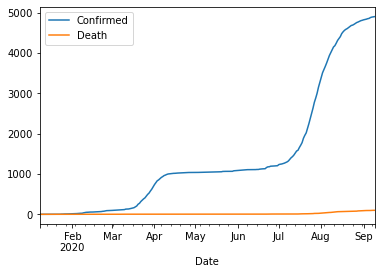

In [40]:
df_covid.plot()

In [52]:
len(df_covid.index)

246

In [44]:
df_covid

,Confirmed,Death
Date,,
2020-01-08,0,0
2020-01-09,0,0
2020-01-10,0,0
2020-01-11,0,0
2020-01-12,0,0
...,...,...
2020-09-05,4857,94
2020-09-06,4878,95
2020-09-07,4889,98


In [66]:
df_covid["Confirmed"][1]

0

In [80]:
confirmed_new = []
death_new = []
confirmed_new.append(df_covid["Confirmed"][0])
death_new.append(df_covid["Death"][0])
for n in range(1, len(df_covid.index)):
    confirmed_new.append(df_covid["Confirmed"][n] - df_covid["Confirmed"][n-1])
    death_new.append(df_covid["Death"][n] - df_covid["Death"][n-1])

In [81]:
len(death_new)

246

In [82]:
df_covidnew = pd.DataFrame({"Date": list(df_covid.index), "Confirmed": confirmed_new, "Death": death_new})
df_covidnew

,Date,Confirmed,Death
0,2020-01-08,0,0
1,2020-01-09,0,0
2,2020-01-10,0,0
3,2020-01-11,0,0
4,2020-01-12,0,0
...,...,...,...
241,2020-09-05,7,0
242,2020-09-06,21,1
243,2020-09-07,11,3
244,2020-09-08,6,1


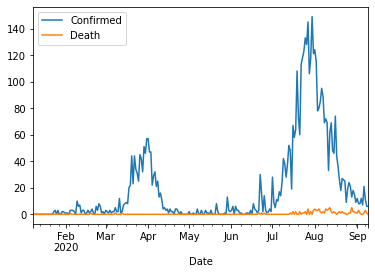

In [84]:
df_covidnew.set_index("Date", inplace=True)
df_covidnew.plot()